# Labs 3 & 4 - Classifiers
## Logistic Regression, Support Vector Machines & Random Forests 

In this lab, you will apply classification algorithms to predict credit defaults.  You'll be working with the well-known German Credit dataset, freely available from the UCI Machine Learning Repository.  This lab will guide you through the process of building and evaluating three popular classifiers: Logistic Regression, Support Vector Machines (SVM), and Random Forest.  You will gain practical experience in training, tuning, and comparing the performance of these models on the German Credit dataset, giving you valuable insights into their effectiveness for credit scoring.  By the end of this lab, you'll have a better understanding of how these classifers can be used to predict binary classes and the factors that influence credit defaults.


In [5]:
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


We begin by importing the core libraries needed for our analysis: NumPy and Pandas help us with numerical operations and data manipulation, while Matplotlib and Seaborn are used for creating visualizations. You then fetch the dataset using a helper function from the ucimlrepo package by specifying the identifier 144, which corresponds to the German credit defaults dataset. 
You have to `pip install ucimlrepo` first before you can fetch the German credit data. From inside the notebook, you can do '!pip install ucimlrepo`.

After fetching, we separate the data into features (stored in X) and targets (stored in y) as Pandas dataframes. Finally, we print out the variable information to see what each feature represents, giving you a better understanding of the dataset's structure and the variables you'll work with throughout the lab.

In [ ]:
%pip install ucimlrepo

In [ ]:
%pip install -U certifi

In [ ]:
import os, ssl, certifi

# Make sure Python/urllib uses certifi’s CA bundle
os.environ["SSL_CERT_FILE"] = certifi.where()
ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

from ucimlrepo import fetch_ucirepo
statlog_german_credit_data = fetch_ucirepo(id=144)

X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets
print(statlog_german_credit_data.variables)


           name     role         type     demographic  \
0    Attribute1  Feature  Categorical             NaN   
1    Attribute2  Feature      Integer             NaN   
2    Attribute3  Feature  Categorical             NaN   
3    Attribute4  Feature  Categorical             NaN   
4    Attribute5  Feature      Integer             NaN   
5    Attribute6  Feature  Categorical             NaN   
6    Attribute7  Feature  Categorical           Other   
7    Attribute8  Feature      Integer             NaN   
8    Attribute9  Feature  Categorical  Marital Status   
9   Attribute10  Feature  Categorical             NaN   
10  Attribute11  Feature      Integer             NaN   
11  Attribute12  Feature  Categorical             NaN   
12  Attribute13  Feature      Integer             Age   
13  Attribute14  Feature  Categorical             NaN   
14  Attribute15  Feature  Categorical           Other   
15  Attribute16  Feature      Integer             NaN   
16  Attribute17  Feature  Categ

In [10]:
X


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [11]:
y

,class
0,1
1,2
2,1
3,1
4,2
...,...
995,1
996,1
997,1
998,2


Map attributes to variable names so we can interpret these features.  We extract the variable information from our dataset and then create a mapping between the attribute names and their descriptions using `dict()`. You can see that we use the `zip()` function to pair each attribute name with its corresponding description, converting the result into a dictionary. With this dictionary, we rename the columns of our features dataframe, which makes the dataset more interpretable by replacing generic names with descriptive ones. 

**Please refer to the excel file `attributes_explanation.xlsx` or metadata to understand the meanings of each attribute**

In [12]:
# Variable information 
variable_info = statlog_german_credit_data.variables
# Create a mapping of attribute names to their descriptions
attribute_mapping = dict(zip(variable_info["name"], variable_info["description"]))

# Rename the columns in the dataset using this mapping
X = X.rename(columns=attribute_mapping)
X

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


**Plot distribution of the target variable**

We start by creating a figure with a size of 8 by 6 inches to provide ample space for our visualization. You then generate a count plot using Seaborn, which displays the distribution of credit classes by counting the instances of each class present in your target variable. Custom styling is applied using the 'viridis' color palette to enhance visual appeal. We add a title and label the axes with adjusted font sizes to ensure the plot is clear and informative, making it easier for you to interpret the distribution of credit statuses in the dataset.

We use `y.squeeze()` because the target from UCI is a DataFrame, but seaborn expects a Series.

/var/folders/0m/13pzppds4059l1lt8hjbqhyh0000gn/T/ipykernel_34463/1923603029.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y.squeeze(), palette='viridis')


Text(0, 0.5, 'Count')

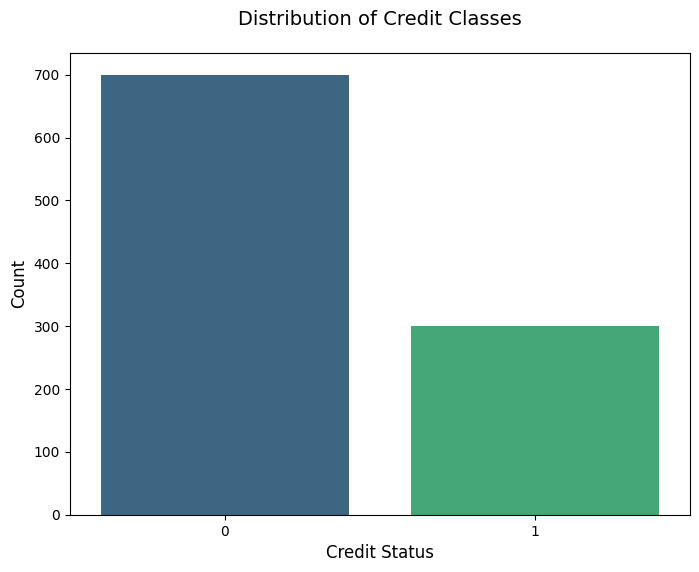

In [13]:
plt.figure(figsize=(8, 6))

# Create a countplot with custom styling
ax = sns.countplot(x=y.squeeze(), palette='viridis')
ax.set_xticks([0, 1])
ax.set_xticklabels(["0", "1"]) # ["Good", "Bad"]

# Add title and labels with fontsize adjustments
plt.title('Distribution of Credit Classes', fontsize=14, pad=20)
plt.xlabel('Credit Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

From the bar chart, you can see that there are substantially more instances labeled as 0 (good credit) than as 1 (bad credit), indicating a clear **class imbalance**. In this dataset, around two-thirds of the observations belong to the good credit class, while about one-third fall into the bad credit class. This imbalance means that if we were to train a model without addressing it, the model might favor predicting the majority class. As a result, we need to consider strategies—such as using stratified splits or specialized performance metrics—to ensure that the minority class is also accurately modeled.

We will deal with class imabalance during the preprocessing step. 

In [14]:
# display variable information all 
variable_info.head(50) 

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,NaN,Status of existing checking account,NaN,no
1,Attribute2,Feature,Integer,NaN,Duration,months,no
2,Attribute3,Feature,Categorical,NaN,Credit history,NaN,no
3,Attribute4,Feature,Categorical,NaN,Purpose,NaN,no
4,Attribute5,Feature,Integer,NaN,Credit amount,NaN,no
5,Attribute6,Feature,Categorical,NaN,Savings account/bonds,NaN,no
6,Attribute7,Feature,Categorical,Other,Present employment since,NaN,no
7,Attribute8,Feature,Integer,NaN,Installment rate in percentage of disposable i...,NaN,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,NaN,no
9,Attribute10,Feature,Categorical,NaN,Other debtors / guarantors,NaN,no


## Data Clearning - Outliers and Missing Data 

We start by merging the features (X) and the target variable (y) into a single DataFrame for easier data manipulation and visualization. We then rename the target variable from "class" to "Credit Risk" to improve clarity. Additionally, we map the numerical credit risk labels (1 and 2) to their respective category names ("Good Credit" and "Bad Credit"), making the dataset more interpretable.




In [15]:
# merge features and target using pd.merge 
df = pd.merge(X, y, left_index=True, right_index=True) # or df = pd.concat([X, y], axis=1)

# Rename target variable for clarity
df.rename(columns={"class": "Credit Risk"}, inplace=True)
df["Credit Risk"] = df["Credit Risk"].map({1: "Good Credit", 2: "Bad Credit"})

df

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Good Credit
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,Bad Credit
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Good Credit
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Good Credit
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,Bad Credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,Good Credit
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,Good Credit
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,Good Credit
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,Bad Credit


In [16]:
print(df["Credit Risk"].value_counts())

Credit Risk
Good Credit    700
Bad Credit     300
Name: count, dtype: int64


Next, we check for missing values by using the .isnull().sum() function, which counts the number of missing entries in each column. If any missing values exist, we will need to handle them appropriately.

For outlier detection, we focus on numerical columns and apply the Interquartile Range (IQR) method. This method identifies values that lie beyond 1.5 times the IQR from the first (Q1) and third (Q3) quartiles. Any values beyond these bounds are considered potential outliers. We then count the number of outliers for each numerical column and store this summary in a DataFrame for better readability.

This step is crucial because missing values and outliers can negatively impact model performance. If outliers are due to errors or extreme variations, we might need to remove or transform them before training our models.

In [17]:
# Checking for missing values
missing_values = df.isnull().sum()

# Checking for outliers using IQR method for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
outlier_summary = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = len(outliers)

# Convert the outlier summary to a DataFrame for better readability
outlier_summary_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=["Outlier Count"])

# Display results
outlier_summary_df


,Outlier Count
Duration,70
Credit amount,72
Installment rate in percentage of disposable income,0
Present residence since,0
Age,23
Number of existing credits at this bank,6
Number of people being liable to provide maintenance for,155


In [18]:
outlier_summary

{'Duration': 70,
 'Credit amount': 72,
 'Installment rate in percentage of disposable income': 0,
 'Present residence since': 0,
 'Age': 23,
 'Number of existing credits at this bank': 6,
 'Number of people being liable to provide maintenance for': 155}

Outliers were detected in some of the numerical variables. Instead of removing them, we will instead scale all variables before training the model. 

The most number of outliers is in - "Number of people being liable to provide maintenance for" (155 outliers) which suggests that a small subset of applicants may have an unusually high number of dependents, which could be due to data entry errors or rare cases. "Credit amount" (72 outliers) and "Duration" (70 outliers) - These outliers likely represent extreme loan amounts or unusually long/short credit terms, which could impact model performance.  "Age" (23 outliers): These variables may have a skewed distribution, where a few customers either take very large loans at extreme age ranges.


In [19]:
print(missing_values)

Status of existing checking account                         0
Duration                                                    0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age                                                         0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

There are no missing observations. 

In [20]:
%pip install missingno

Defaulting to user installation because normal site-packages is not writeable
  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


<Axes: >

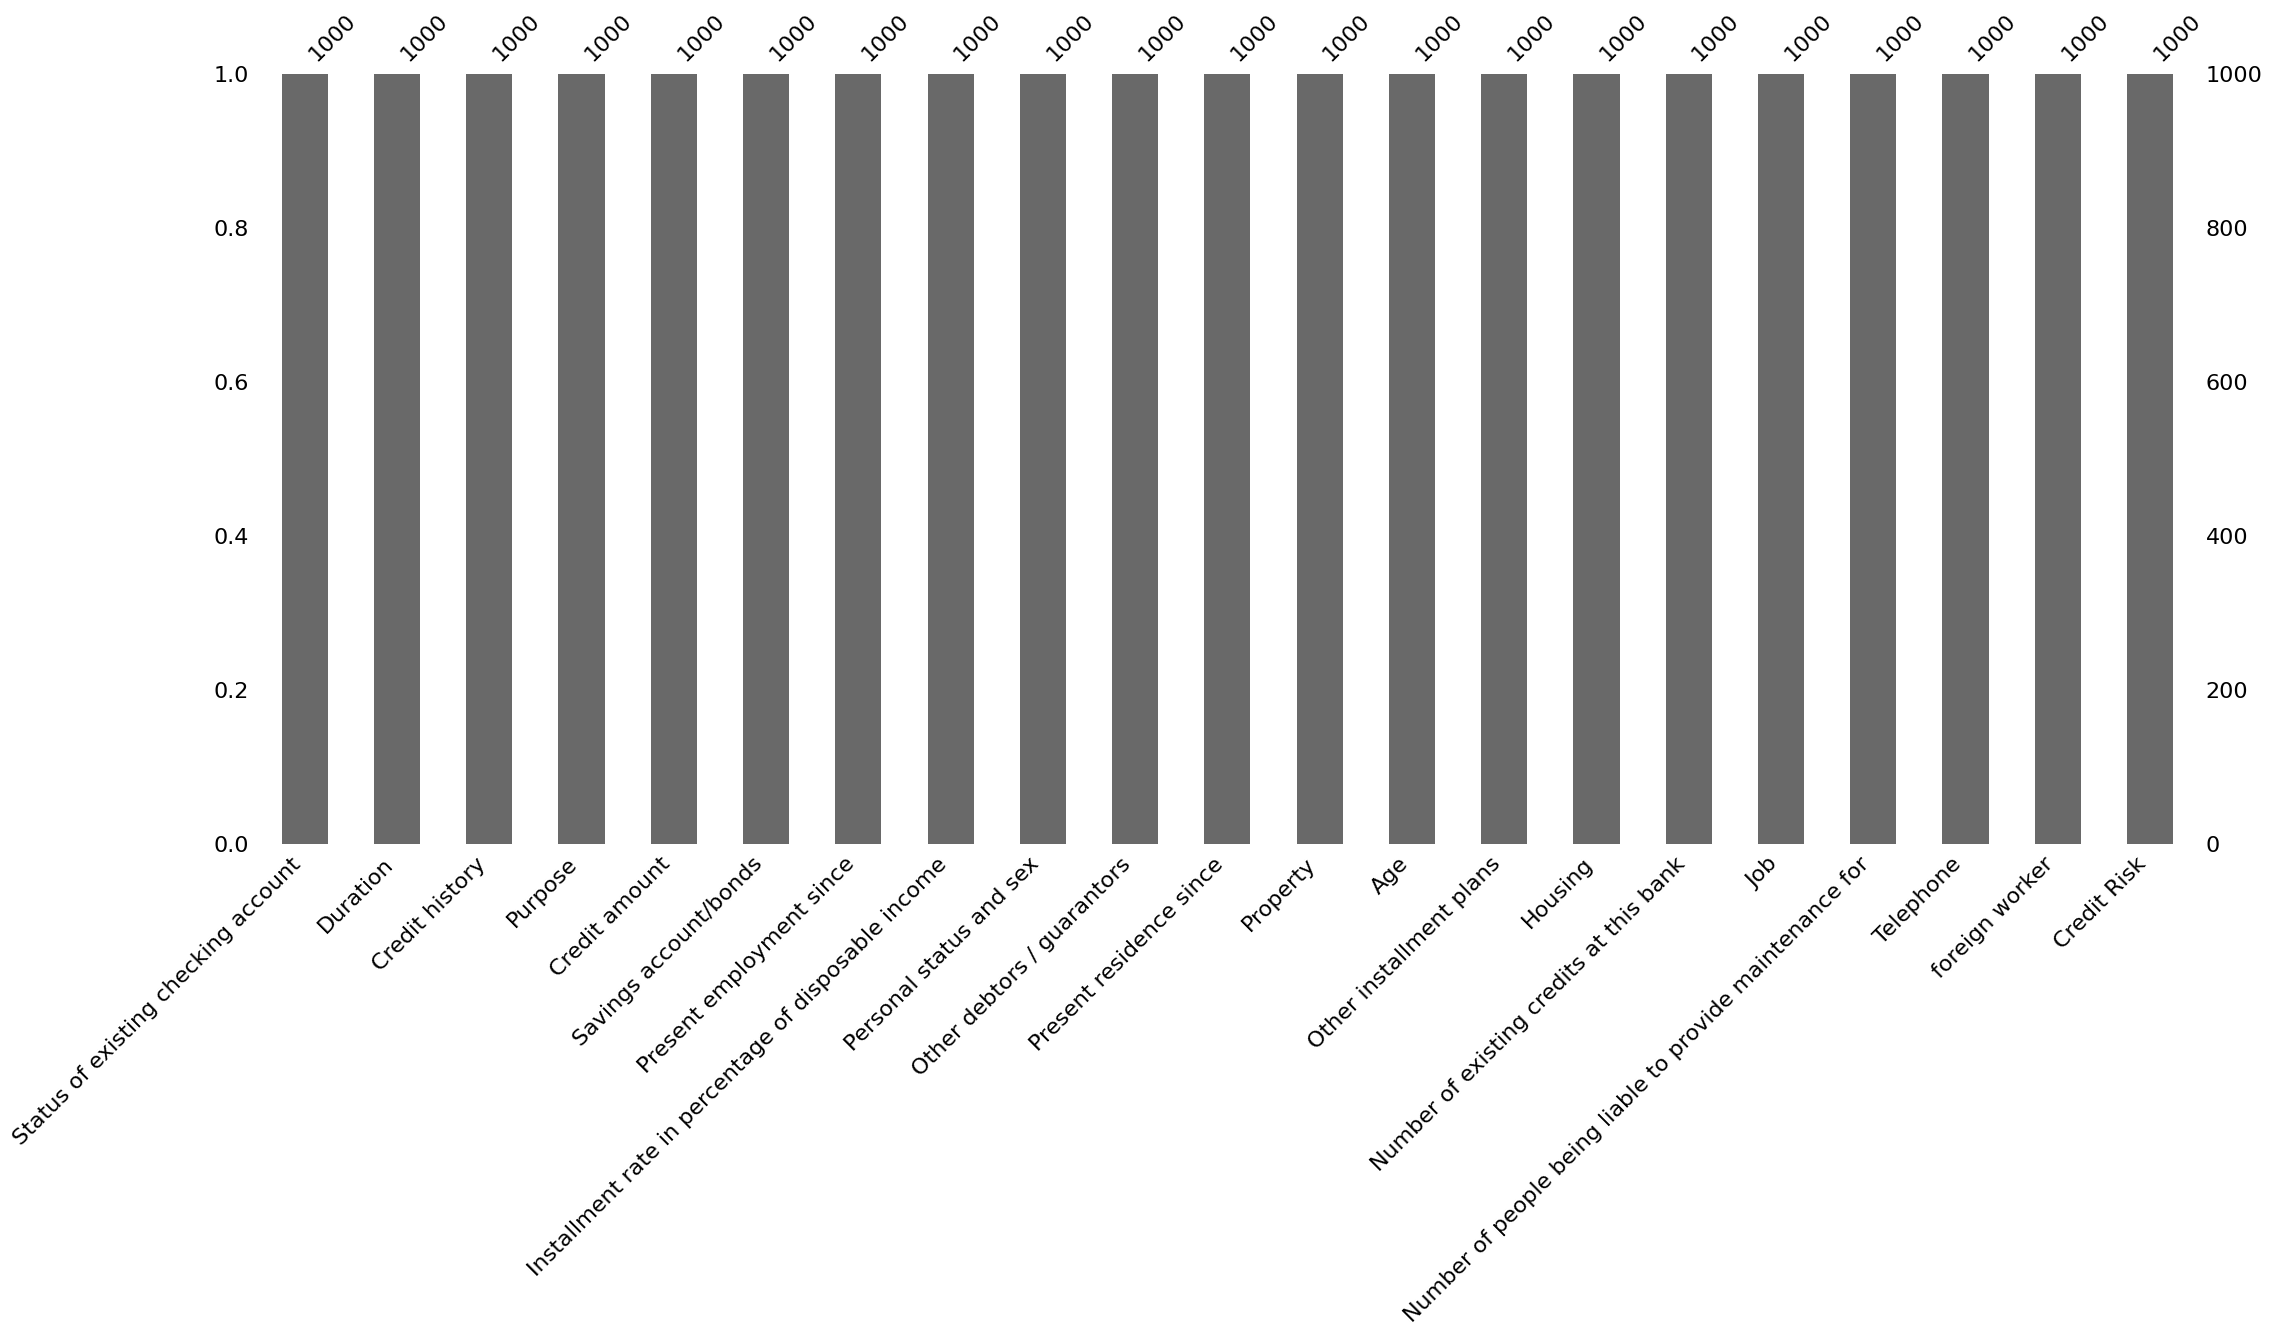

In [21]:
import missingno as msno
msno.bar(df)  # Visual confirmation of no missing values

In [22]:
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


There are no duplicates in the dataframe. 

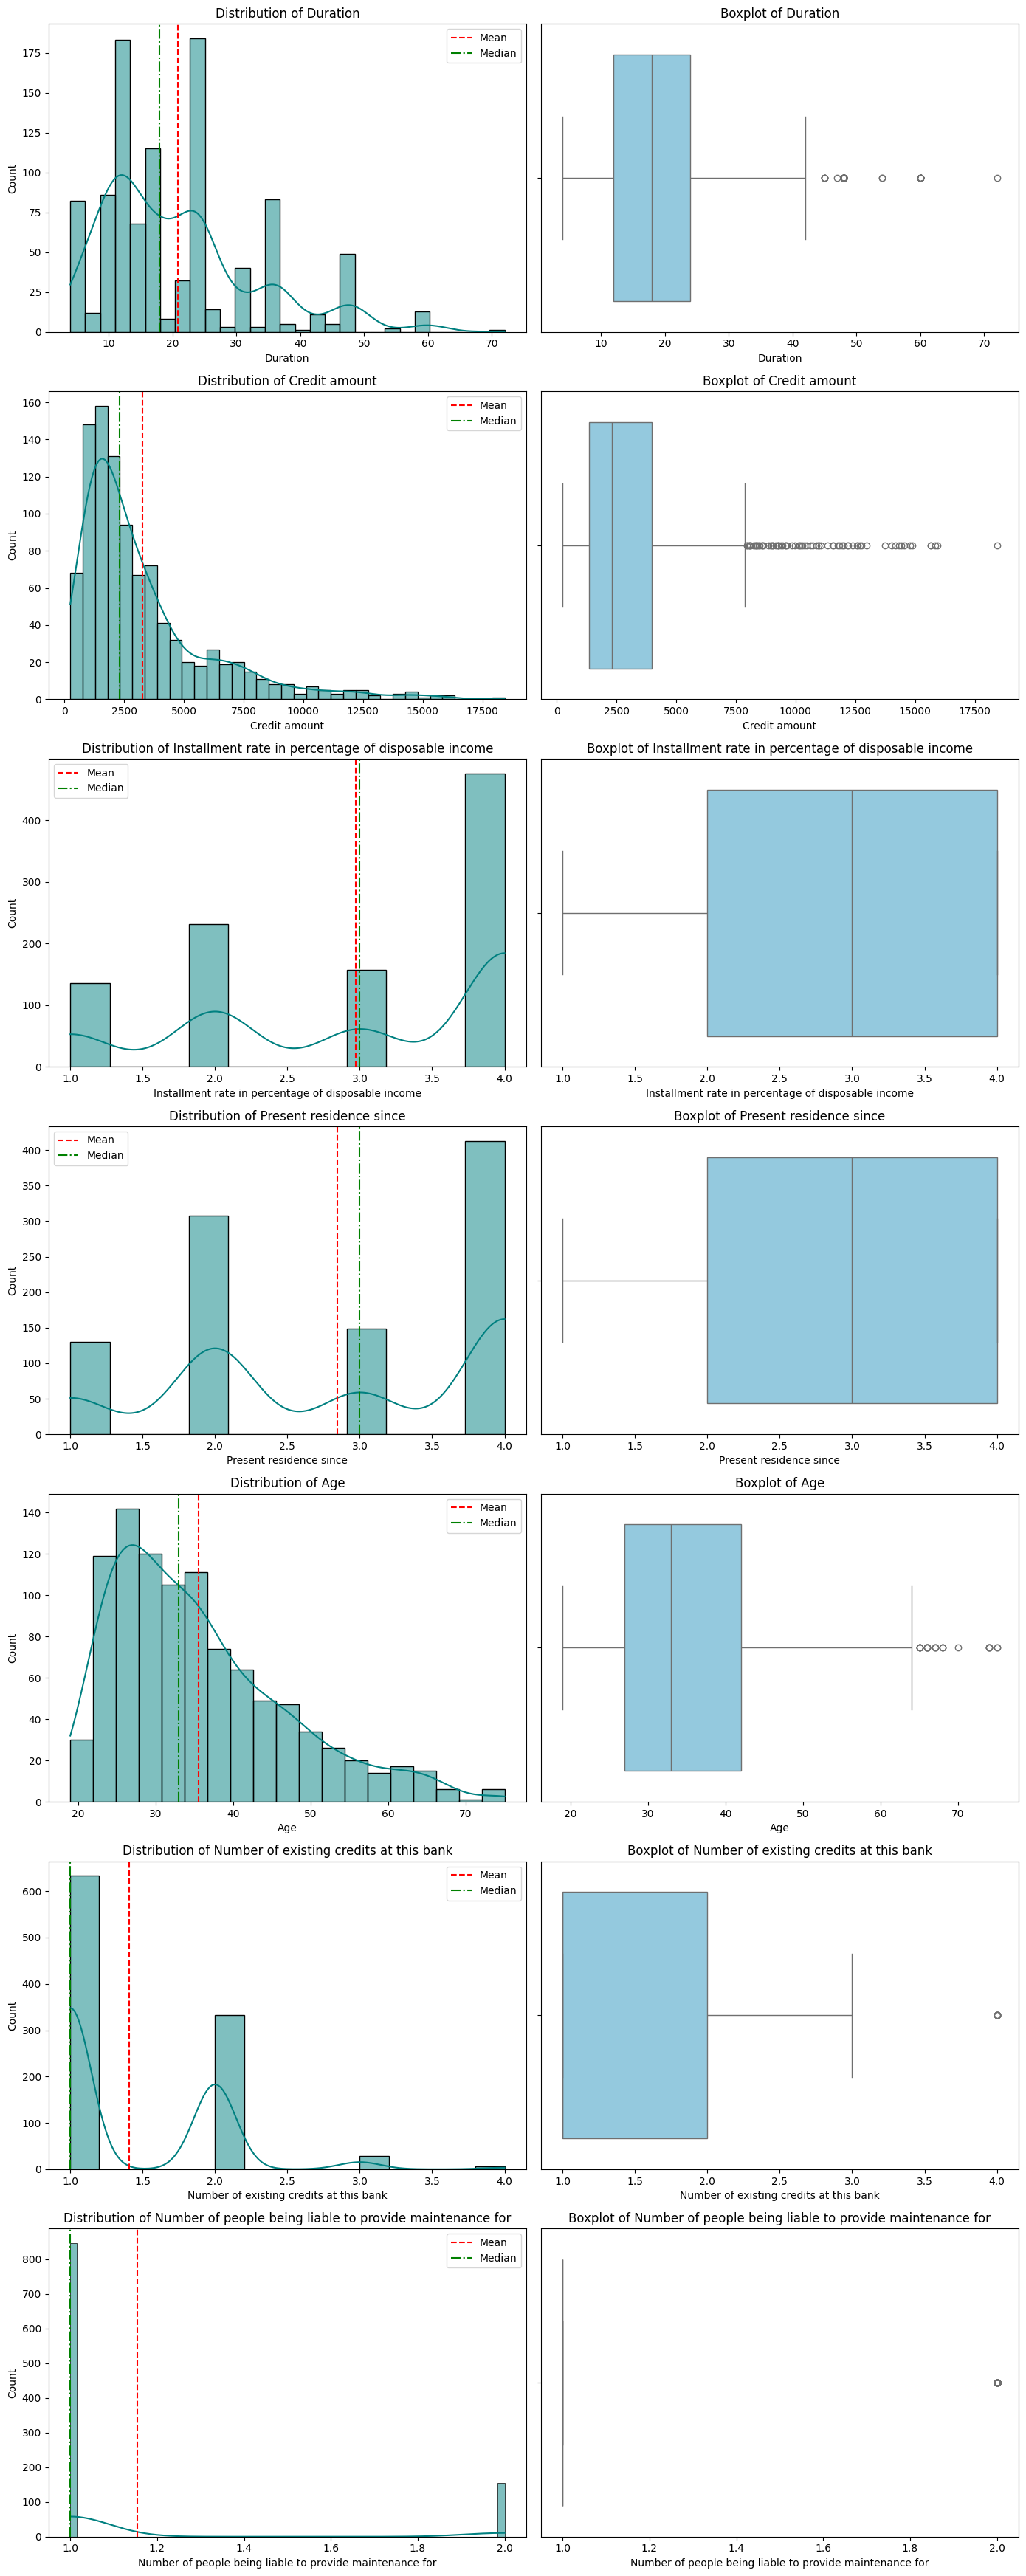

In [23]:
# Create subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, 
                         figsize=(14, 5*len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    # Histogram with KDE
    sns.histplot(df[col], kde=True, ax=axes[i,0], color='teal')
    axes[i,0].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i,0].axvline(df[col].median(), color='green', linestyle='-.', label='Median')
    axes[i,0].set_title(f'Distribution of {col}', fontsize=12)
    axes[i,0].legend()
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i,1], color='skyblue')
    axes[i,1].set_title(f'Boxplot of {col}', fontsize=12)
    
plt.tight_layout()
plt.show()

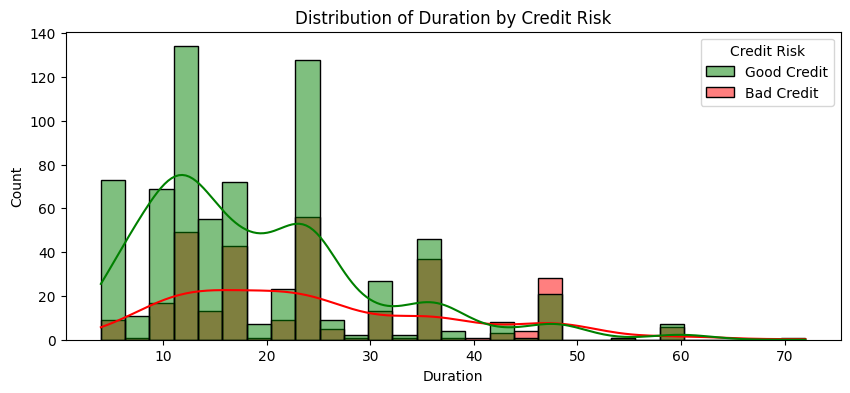

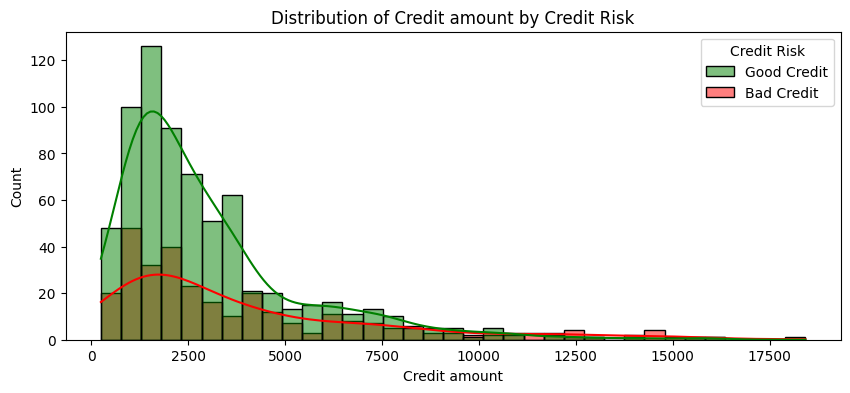

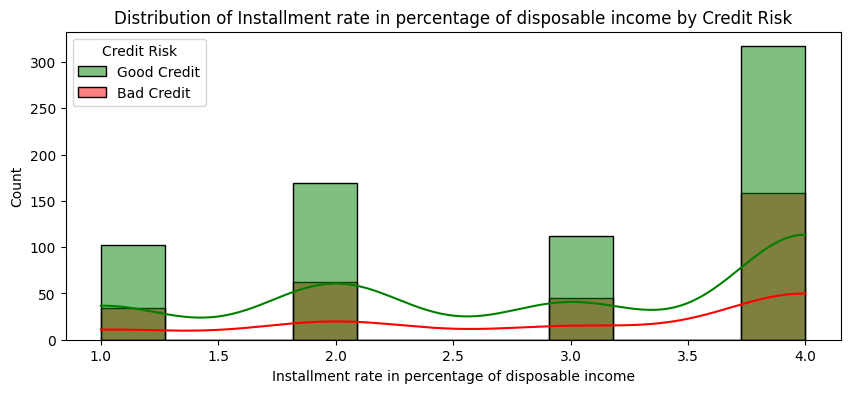

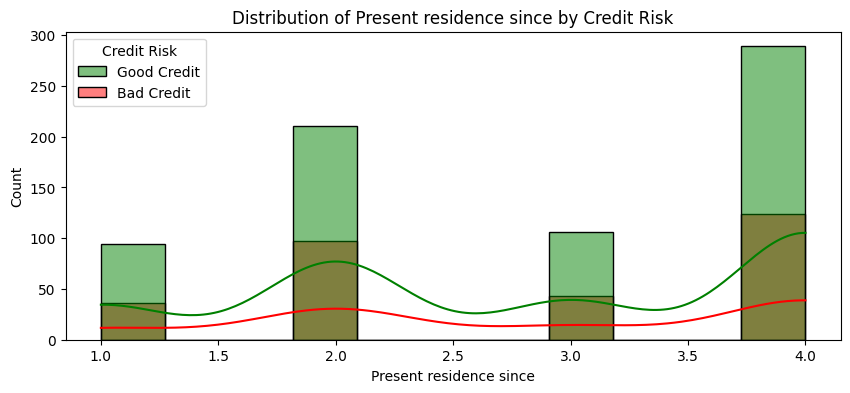

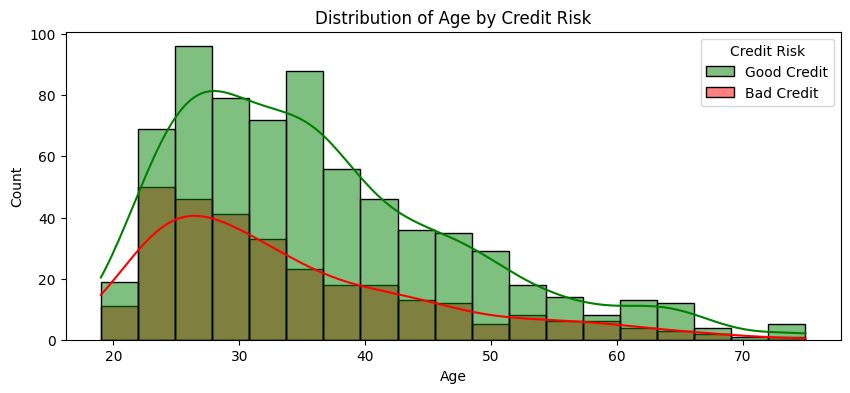

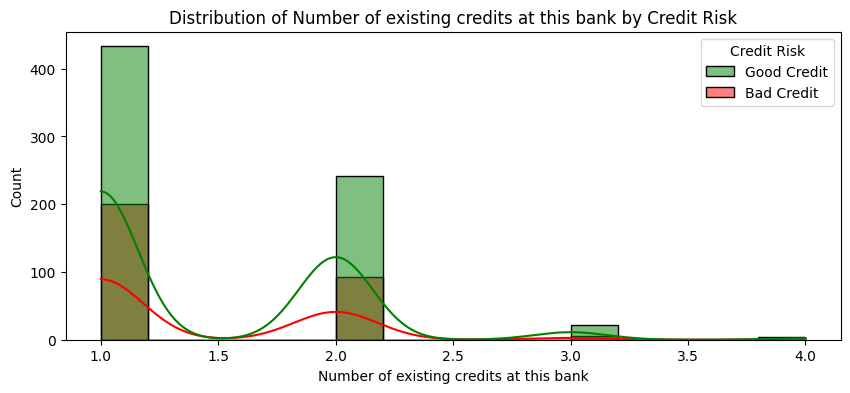

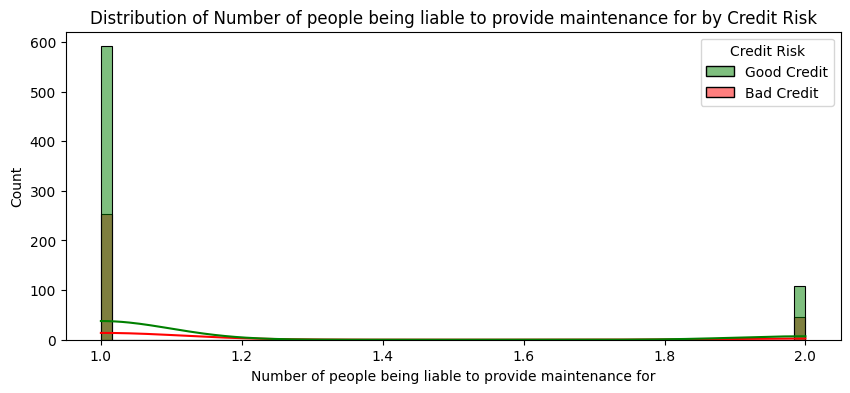

In [24]:
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=col, hue='Credit Risk', kde=True, 
                 palette={'Good Credit':'green', 'Bad Credit':'red'})
    plt.title(f'Distribution of {col} by Credit Risk', fontsize=12)
    plt.show()

## Target Variable 

Target Variable:

- Variable Name: class
- Description: Creditworthiness classification of the applicant.
- Values & Meaning:
    - 1 → Good Credit Risk (The applicant is considered a low risk for defaulting on the loan).
    - 2 → Bad Credit Risk (The applicant is considered a high risk for defaulting on the loan).

We will later encode this variable to 0 - good and 1 - bad. 
This target variable is what we will predict using classification models like Logistic Regression, SVM, and Random Forests. 

In [25]:
df 

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Good Credit
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,Bad Credit
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Good Credit
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Good Credit
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,Bad Credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,Good Credit
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,Good Credit
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,Good Credit
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,Bad Credit


## Feature Engineering 

Now, we perform feature engineering by transforming some categorical variables into more interpretable formats. Feature engineering is the art and science of creating new input features from your raw data. It's about transforming and combining existing variables to make your machine learning models better at their job. Think of it as giving your model more insightful clues to learn from! It is possible that sometimes some transformations of existing variables act as better predictors than the variables themselves. 

First, we create age groups by defining bins that segment customers into different age ranges. Using pd.cut(), we categorize the "Age" column into predefined age groups, making it easier to analyze trends related to age rather than working with raw age values.

Next, we rename categorical features using meaningful labels. Some of the original feature values are encoded as codes (e.g., "A71", "A72"), which are not intuitive. We use mapping dictionaries to replace these codes with readable labels:

- Employment Status: The variable "Present employment since" is mapped to understandable categories, ranging from "Unemployed" to "≥ 7 years" of employment. This helps in evaluating job stability as a factor in credit risk.
- Housing: The "Housing" variable is translated into categories like "Rent," "Own," and "For free," providing a clearer understanding of the applicant's housing situation.
- Personal Status & Sex: The variable "Personal status and sex" is also mapped to descriptive labels, helping to differentiate individuals based on both gender and marital status.

These transformations enhance the readability of the dataset, making it easier to interpret patterns and relationships between features and credit risk. This step is particularly useful for exploratory data analysis (EDA) and for feeding into machine learning models that perform better with meaningful categorical encodings.

Using the variable information excel file and based on our intuition, we create appropriate groupings for select attributes. 

In [26]:
# Create Age Groups
age_bins = [18, 25, 35, 45, 55, 65, 75]
age_labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66-75"]
df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

# Rename categorical features with meaningful labels
employment_mapping = {
    "A71": "Unemployed",
    "A72": "< 1 year",
    "A73": "1-4 years",
    "A74": "4-7 years",
    "A75": "≥ 7 years"
}
df["Employment Status"] = df["Present employment since"].map(employment_mapping)

housing_mapping = {
    "A151": "Rent",
    "A152": "Own",
    "A153": "For free"
}
df["Housing"] = df["Housing"].map(housing_mapping)

personal_status_mapping = {
    "A91": "Male - Divorced/Separated",
    "A92": "Female - Divorced/Separated/Married",
    "A93": "Male - Single",
    "A94": "Male - Married/Widowed",
    "A95": "Female - Single"
}
df["Personal Status & Sex"] = df["Personal status and sex"].map(personal_status_mapping)

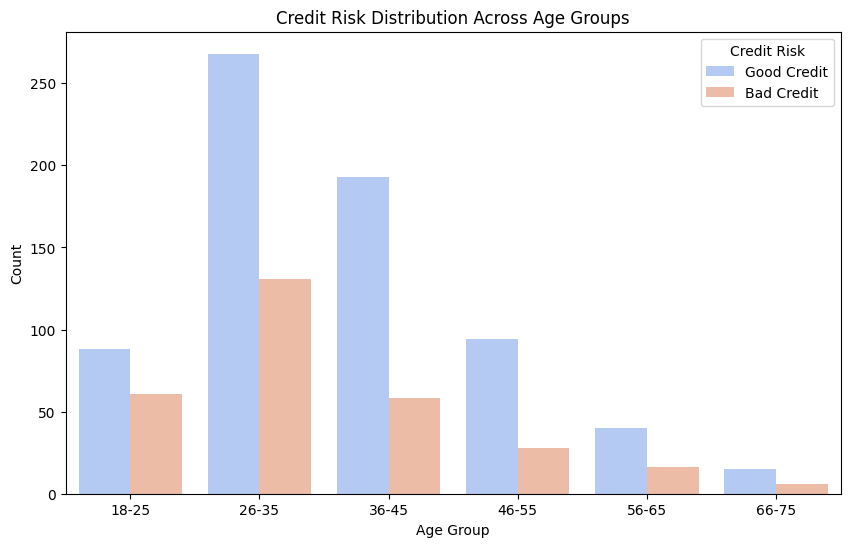

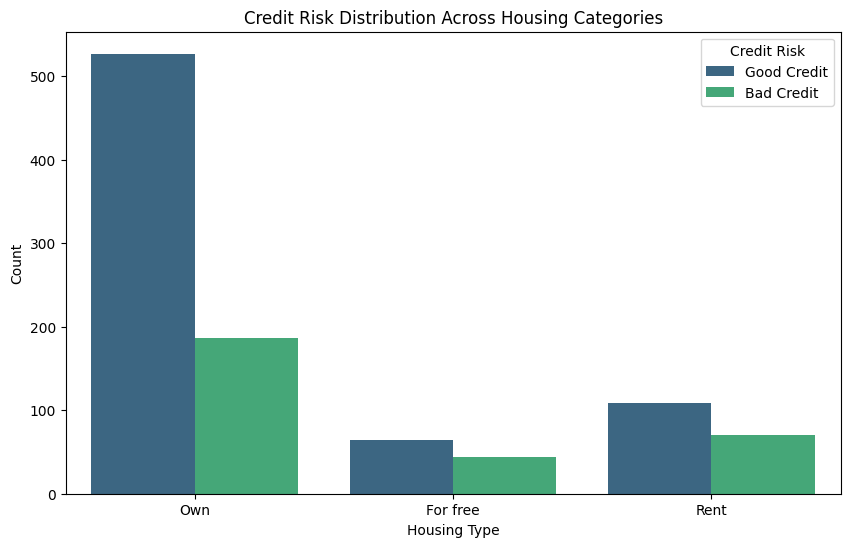

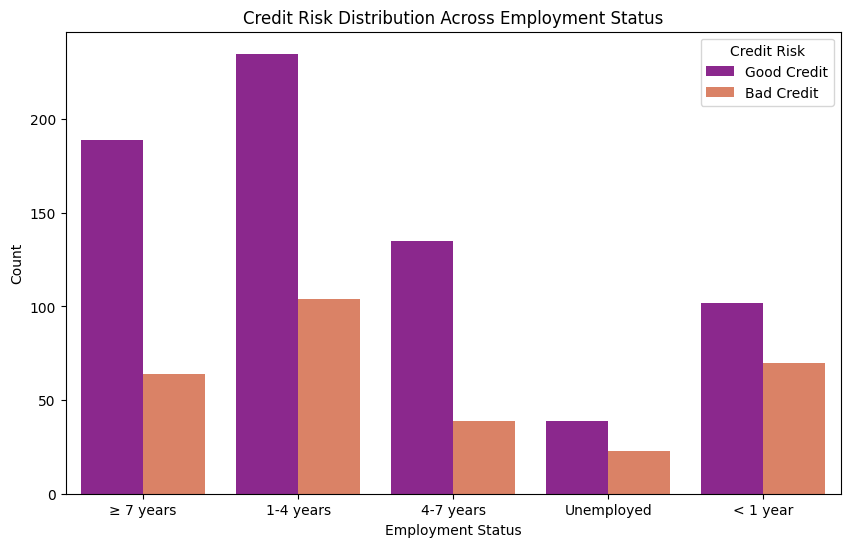

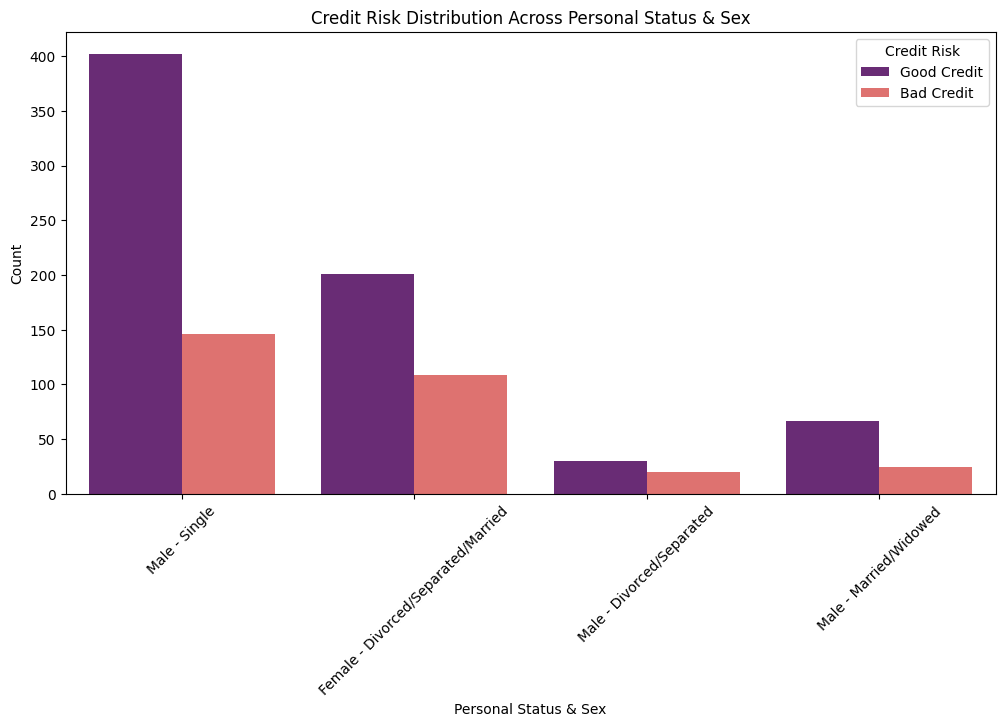

In [27]:
# Visualization: Credit Risk by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x="Age Group", hue="Credit Risk", data=df, palette="coolwarm")
plt.title("Credit Risk Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Credit Risk")
plt.show()

# Visualization: Credit Risk by Housing Status
plt.figure(figsize=(10, 6))
sns.countplot(x="Housing", hue="Credit Risk", data=df, palette="viridis")
plt.title("Credit Risk Distribution Across Housing Categories")
plt.xlabel("Housing Type")
plt.ylabel("Count")
plt.legend(title="Credit Risk")
plt.show()

# Visualization: Credit Risk by Employment Status
plt.figure(figsize=(10, 6))
sns.countplot(x="Employment Status", hue="Credit Risk", data=df, palette="plasma")
plt.title("Credit Risk Distribution Across Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.legend(title="Credit Risk")
plt.show()

# Visualization: Credit Risk by Personal Status & Sex
plt.figure(figsize=(12, 6))
sns.countplot(x="Personal Status & Sex", hue="Credit Risk", data=df, palette="magma")
plt.title("Credit Risk Distribution Across Personal Status & Sex")
plt.xlabel("Personal Status & Sex")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Credit Risk")
plt.show()


Box plots of the above histograms. 

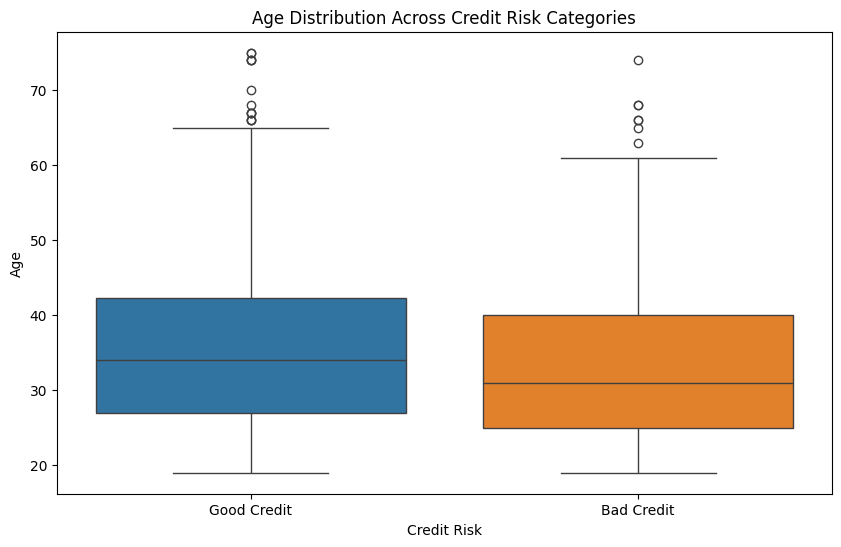

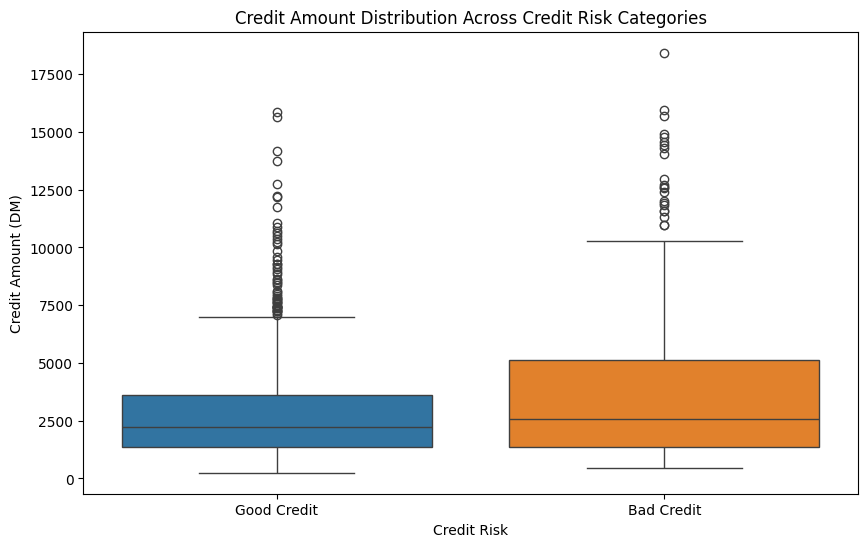

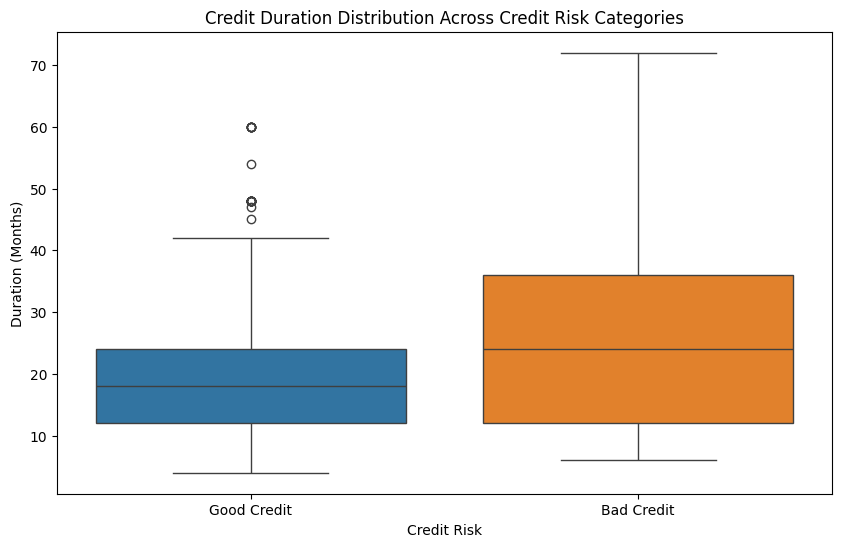

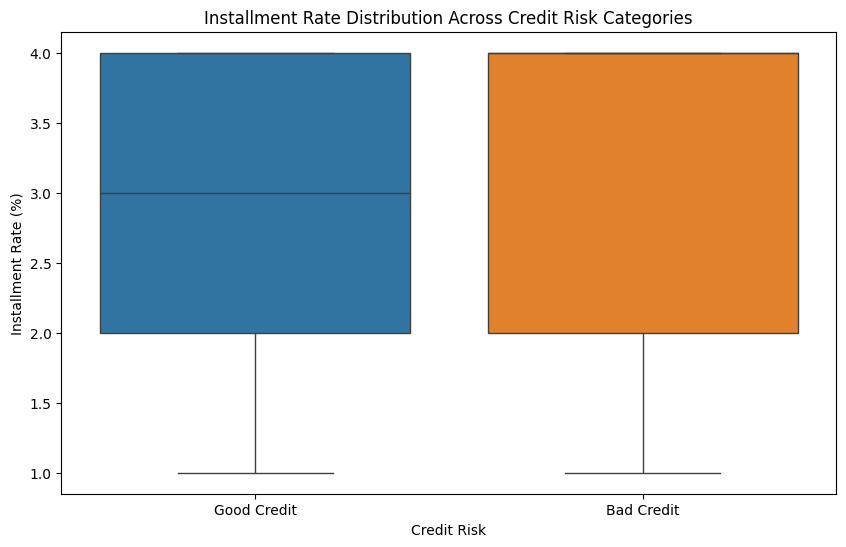

In [28]:
# Updating the box plots to follow the new seaborn syntax recommendation

# Box plot: Age distribution by Credit Risk
plt.figure(figsize=(10, 6))
sns.boxplot(x="Credit Risk", y="Age", data=df, hue="Credit Risk")
plt.title("Age Distribution Across Credit Risk Categories")
plt.xlabel("Credit Risk")
plt.ylabel("Age")
plt.show()

# Box plot: Credit Amount distribution by Credit Risk
plt.figure(figsize=(10, 6))
sns.boxplot(x="Credit Risk", y="Credit amount", data=df, hue="Credit Risk")
plt.title("Credit Amount Distribution Across Credit Risk Categories")
plt.xlabel("Credit Risk")
plt.ylabel("Credit Amount (DM)")
plt.show()

# Box plot: Duration distribution by Credit Risk
plt.figure(figsize=(10, 6))
sns.boxplot(x="Credit Risk", y="Duration", data=df, hue="Credit Risk")
plt.title("Credit Duration Distribution Across Credit Risk Categories")
plt.xlabel("Credit Risk")
plt.ylabel("Duration (Months)")
plt.show()

# Box plot: Installment Rate distribution by Credit Risk
plt.figure(figsize=(10, 6))
sns.boxplot(x="Credit Risk", y="Installment rate in percentage of disposable income", data=df, hue="Credit Risk")
plt.title("Installment Rate Distribution Across Credit Risk Categories")
plt.xlabel("Credit Risk")
plt.ylabel("Installment Rate (%)")
plt.show()


## What can we infer from these plots?


- Age & Experience Matter: Younger individuals, renters, and unemployed applicants tend to have a higher proportion of bad credit cases.Older and more experienced individuals tend to manage credit better.
- Stable Employment = Better Credit: Longer employment history correlates with Good Credit.
- Homeowners Have Lower Risk: People who own houses are generally more creditworthy. Homeownership, job stability, and being married or widowed are correlated with lower credit risk.
- High Loan Amounts = Higher Risk: Larger credit amounts and longer durations increase the likelihood of Bad Credit.
- Higher Installment Rates Indicate Higher Risk: If a large portion of a borrower's income goes to installments, they are more likely to default.

Single males tend to have higher loan applications but also show more financial risk compared to other groups.

## Correlation of Main Numerical Attributes

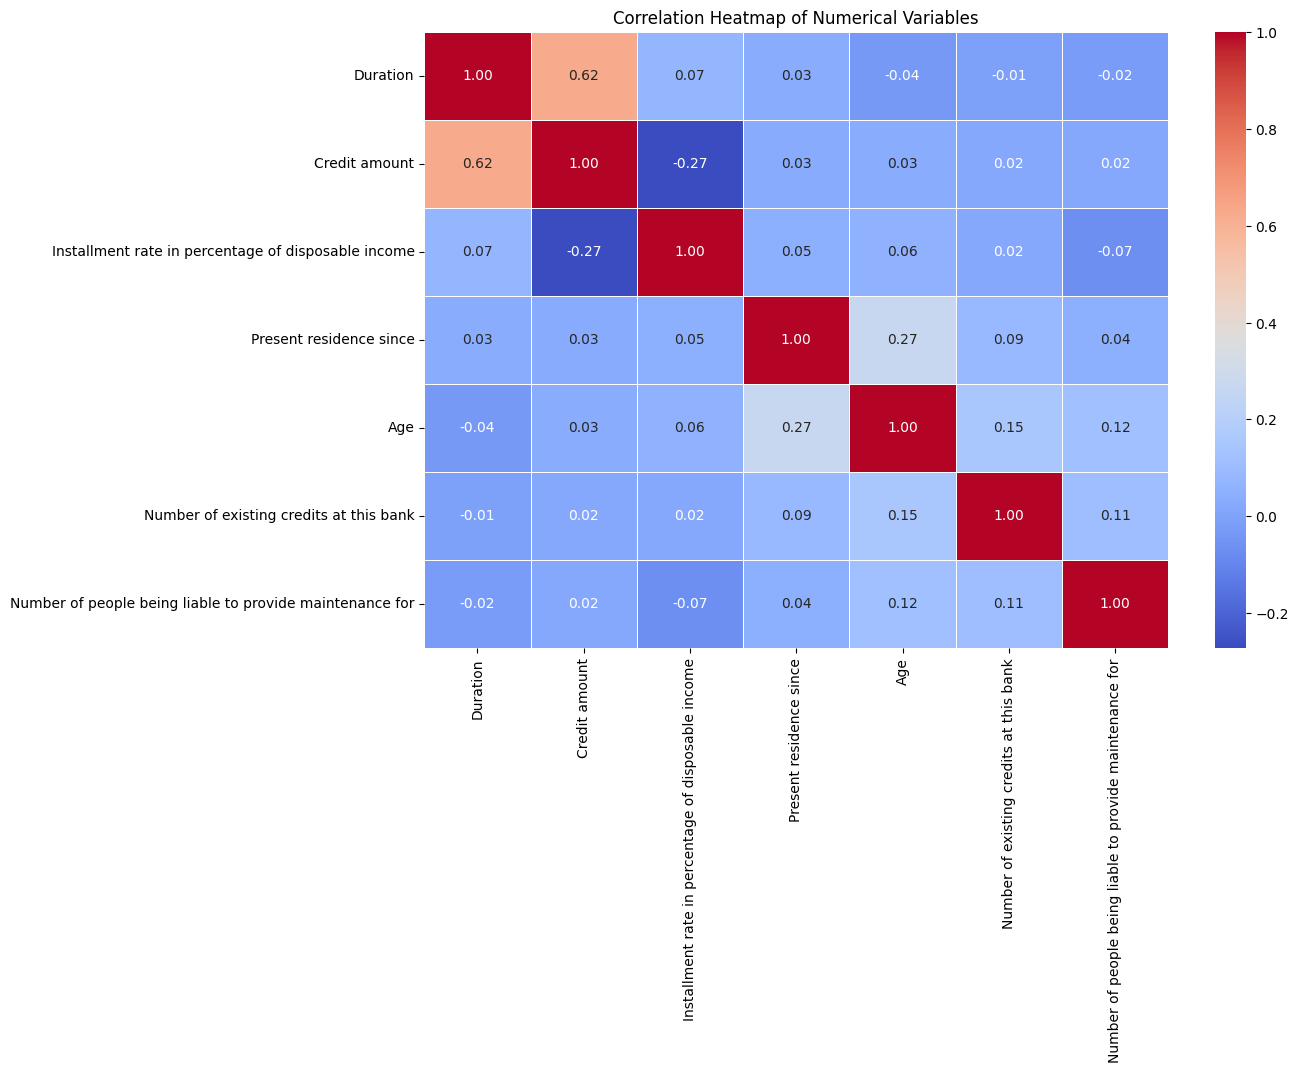

In [29]:
# Compute correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Create a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


- Credit Amount & Duration: These two variables show a strong positive correlation. Longer durations tend to be associated with higher loan amounts.
- Installment Rate & Credit Amount: Low correlation between these two suggests that installment rates do not directly depend on loan amount, likely due to different financial backgrounds of applicants.
- Age & Credit Duration: Weak correlation, meaning age does not strongly influence the length of credit duration.
- Number of Existing Credits & Credit Amount: Slight correlation, meaning people with more existing credit tend to take slightly higher amounts.

Most variables are weakly correlated with each other, indicating low multicollinearity in the dataset.

Note: Not all of these variables are purely numeric. Credit Amount, Duration in months and Age are the pure numeric variables. It will also be worthwile to do further feature engineering and come up with additional features that can be better predictors. 

Considering that there is no single variable that massively determines creditworthiness, it is highly likely that models like Random Forests may outperform simple models like Logistic Regression since there aer complex interactions rather than strong linear relationships. 

## Model Training and Evaluation - Logistic Regression 

Models like Logistic Regression and SVM require numerical input. The German dataset has categorical features (e.g., purpose, savings_account, employment_status).

We will ensure All Categorical Variables Are encoded (0/1) and all numerical variables are scaled. It is helpful then to explicitly define what these numerical and categorical columns are before we fit the model. 

In [30]:
# list all column names 
X.columns

Index(['Status of existing checking account', 'Duration', 'Credit history',
       'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age', 'Other installment plans',
       'Housing', 'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker'],
      dtype='str')

In [31]:
# define numerical cols and categorical cols explicitly to be used in the pipeline
numerical_cols = ['Duration', 'Credit amount', 'Age', 'Installment rate in percentage of disposable income']
df[numerical_cols].head()


,Duration,Credit amount,Age,Installment rate in percentage of disposable income
0,6,1169,67,4
1,48,5951,22,2
2,12,2096,49,2
3,42,7882,45,2
4,24,4870,53,3


In [32]:
categorical_cols = ['Employment Status', 'Housing', 'Personal status and sex']
df[categorical_cols].head()

,Employment Status,Housing,Personal status and sex
0,≥ 7 years,Own,A93
1,1-4 years,Own,A92
2,4-7 years,Own,A93
3,4-7 years,For free,A93
4,1-4 years,For free,A93



We use the train_test_split function from scikit-learn to divide our dataset into training and testing sets, with 20% of the data reserved for testing. You’ll notice that we use the stratify parameter with y, which ensures that the distribution of credit risk classes remains consistent across both splits—a critical step when dealing with imbalanced datasets. Additionally, setting random_state to 42 helps ensure that the split is reproducible, meaning that every time you run the code, you will get the same result.

**NOTE: To prevent data leakage, you should first split the data into training and testing samples before you do any kind of pre-processing.**

In [33]:
# %pip install scikit-learn

In [34]:
from sklearn.model_selection import train_test_split

# Split data FIRST to prevent data leakage
X = df.drop('Credit Risk', axis=1)
y = df['Credit Risk'].map({'Good Credit': 0, 'Bad Credit': 1})  # Convert to binary

# Split data FIRST to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

In [ ]:
%pip install imblearn

In [36]:
# load all necessary libraries for the pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline  
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define evaluation metrics
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    f1_score
)

In [37]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [38]:
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [39]:
# Initialize models with class weights

# 1. Logistic Regression Pipeline
lr_pipeline = make_pipeline(
    preprocessor,
    SMOTE(random_state=42),  # Handle class imbalance
    LogisticRegression(class_weight='balanced', max_iter=1000)
)

# 2. SVM Pipeline
svm_pipeline = make_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    SVC(class_weight='balanced', probability=True)  # probability=True for ROC-AUC
)

# 3. Random Forest Pipeline
rf_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(class_weight='balanced')
)

# Train all models
models = {
    'Logistic Regression': lr_pipeline,
    'SVM': svm_pipeline,
    'Random Forest': rf_pipeline
}

Now, We set up a machine learning pipeline to preprocess data and train three different classifiers: Logistic Regression, Support Vector Machine (SVM), and Random Forest. 

Let's break it down:
1. Preprocessing with ColumnTransformer

Before training, we need to preprocess the dataset properly:
- Numerical columns are standardized using `StandardScaler()`, which scales the features to have zero mean and unit variance. This is particularly important for models like Logistic Regression and SVM.
- Categorical columns are encoded using `OneHotEncoder()`, which converts categorical variables into binary columns (dummy variables). The handle_unknown='ignore' parameter ensures that unseen categories in the test set do not cause errors.

2. Defining Evaluation Metrics

We import standard classification metrics such as:
- classification_report (precision, recall, F1-score, etc.),
- confusion_matrix (to analyze correct vs. incorrect predictions),
- roc_auc_score (useful for imbalanced classification problems),
- f1_score (a good balance between precision and recall).

3. Model Pipelines

Each model is wrapped inside a pipeline, which ensures that preprocessing and model training are well integrated.

- Logistic Regression Pipeline:
    Uses SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset by generating synthetic examples of the minority class.
    This is an approach to deal with class imbalance in our dataset. 
    Logistic Regression is initialized with class_weight='balanced', meaning it adjusts weights inversely proportional to class frequencies, helping with class imbalance.

- SVM Pipeline:
    Also applies SMOTE for balancing.
    Uses class_weight='balanced' to give more importance to the minority class.
    probability=True is set so that the model can produce probability estimates, which are needed for ROC-AUC analysis.

- Random Forest Pipeline:
    Unlike the other two models, Random Forest is more robust to scaling and class imbalance.
    We still set class_weight='balanced' so that the algorithm compensates for the class imbalance by adjusting sample weights.

4. Training the Models

Finally, we define a dictionary models that stores all three pipelines, making it easy to iterate over them during training and evaluation.

### Performance 

We iterate through the models dictionary, where each key represents a model's name and the corresponding value is its pipeline. For each model:

- We call .fit(X_train, y_train), which preprocesses the data (scaling numerical features, encoding categorical variables, handling class imbalance with SMOTE if applicable) and then trains the classifier.
- `y_pred = model.predict(X_test)`: Generates predicted class labels for the test set.
- `y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None`:
    - Some models, like SVM with default settings, do not support probability predictions.
    - If predict_proba is available, we extract the probabilities for the positive class (credit default risk), which is useful for ROC-AUC evaluation.

We then assess each classifier model using multiple evaluation metrics. 

In [40]:
for name, model in models.items():
    print(f"\n=== Training {name} ===")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None
    
    # Evaluation
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    if y_proba is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")
    print("F1 Score:", f1_score(y_test, y_pred))


=== Training Logistic Regression ===

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.78      0.61      0.69       140
           1       0.40      0.60      0.48        60

    accuracy                           0.61       200
   macro avg       0.59      0.61      0.58       200
weighted avg       0.67      0.61      0.63       200

Confusion Matrix:
 [[86 54]
 [24 36]]
ROC-AUC: 0.666
F1 Score: 0.48

=== Training SVM ===

SVM Evaluation:
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       140
           1       0.38      0.55      0.45        60

    accuracy                           0.59       200
   macro avg       0.57      0.58      0.56       200
weighted avg       0.65      0.59      0.61       200

Confusion Matrix:
 [[86 54]
 [27 33]]
ROC-AUC: 0.659
F1 Score: 0.4489795918367347

=== Training Random Forest ===

Random Forest Evaluation:
              precision    

| Model | Accuracy | Precision <br> (Bad <br> Credit) | Recall <br> (Bad <br> Credit) | F1 Score (Bad <br> Credit) | ROC- <br> AUC | Key Issues |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Logistic Regression | 61% | 0.40 | 0.60 | 0.48 | 0.666 | Struggles with precision for bad credit but has the best recall. |
| SVM | 59% | 0.38 | 0.55 | 0.45 | 0.659 | Slightly worse than Logistic Regression in recall and precision. |
| Random <br> Forest | 69% | 0.48 | 0.22 | 0.30 | 0.634 | Best accuracy but worst recall, missing too many bad credit cases. |


Logistic Regression and SVM perform similarly, with Logistic Regression slightly better in recall (0.60 vs. 0.55), meaning it identifies more bad credit cases correctly.
Random Forest has the best overall accuracy (69%) but fails in detecting bad credit cases (recall of only 0.22), making it unreliable for identifying high-risk customers.
ROC-AUC scores suggest that all models are only moderately effective, with Logistic Regression performing the best (0.666), followed by SVM (0.659), and then Random Forest (0.634).
False negatives (misclassifying bad credit as good credit) are a major issue in all models, but worst in Random Forest.

Logistic Regression is currently the best-balanced model, but still needs improvement in precision.Random Forest needs significant changes to improve bad credit detection. SVM is not significantly better than Logistic Regression, making it less favorable.

## Improving Model Performance

We improve the previous model training process by introducing feature engineering, improved class balancing, hyperparameter tuning, and comprehensive evaluation metrics. 

1. Feature Engineering: We create a new feature by multiplying Credit Amount and Duration, capturing the interaction between loan size and repayment period.
This allows the model to consider how long-term loans with high amounts influence default risk.

2. Improved Class Rebalancing: Instead of oversampling the minority class (bad credit) to match the majority class, we oversample it to 50% of the majority size. This will reduce the risk of overfitting compared to full oversampling. 

3. Hyperparameter Grids: We experiment with different values of C (regularization strength). Evaluating L1 (Lasso) and L2 (Ridge) penalties to find the best regularization method. This should prevent overfitting and improve generalization. 

For SVM pipeline, we try different values of C (higher values mean stronger classification boundaries). We also test different kernels (RBF vs. Polynomial) and adjust gamma to control influence of training examples. SVM models are sensitive to hyperparameters, so tuning is essential.

For Random Forests, we test different numbers of trees (n_estimators). We control for tree depth (max_depth) to prevent overfitting and Adjust min_samples_split (number of samples needed to split a node). Random Forests can easily overfit, so fine-tuning is necessary.

4. Hyperparameter Tuning with GridSearchCV and Stratified K-Fold: We use GridSearchCV to find the best hyperparameters. We apply Stratified K-Fold (5 folds) to ensure training/testing balance. ROC-AUC is used as the scoring metric, prioritizing models that effectively distinguish between good and bad credit. Stratified K-Fold ensures balanced class distributions in each fold, leading to more stable performance estimates. ROC-AUC is better for imbalanced data than accuracy, ensuring the best hyperparameters are chosen based on how well they separate classes.

In [41]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# 1. Feature Engineering: Create Interaction Feature
df['Credit_Duration_Interaction'] = df['Credit amount'] * df['Duration']
numerical_cols += ['Credit_Duration_Interaction']

X = df.drop('Credit Risk', axis=1)
y = df['Credit Risk'].map({'Good Credit': 0, 'Bad Credit': 1})  # Convert to binary

# Split data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)


In [42]:
# 2. Enhanced Class Rebalancing with SMOTE Tuning
from imblearn.over_sampling import ADASYN, SMOTE

# 3. Define Updated Pipelines with Hyperparameter Grids
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


In [43]:
# Logistic Regression Pipeline
lr_pipeline = make_pipeline(
    preprocessor,
    SMOTE(sampling_strategy=0.5, random_state=42),  # Half of majority class size
    LogisticRegression(solver='liblinear', max_iter=1000)
)

lr_params = {
    'logisticregression__C': np.logspace(-3, 2, 6),  # Stronger regularization
    'logisticregression__penalty': ['l1', 'l2']
}

In [44]:
# SVM Pipeline
svm_pipeline = make_pipeline(
    preprocessor,
    SMOTE(sampling_strategy=0.5, random_state=42),
    SVC(probability=True, class_weight='balanced')
)

svm_params = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto', 0.01],
    'svc__kernel': ['rbf', 'poly']
}

In [45]:
# Random Forest Pipeline
rf_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

rf_params = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5]
}

In [46]:
# 4. GridSearchCV with Stratified K-Fold
models = {
    'Logistic Regression': (lr_pipeline, lr_params),
    'SVM': (svm_pipeline, svm_params),
    'Random Forest': (rf_pipeline, rf_params)
}

best_models = {}
cv_results = []

In [47]:
for name, (pipeline, params) in models.items():
    print(f"\n=== Tuning {name} ===")
    gs = GridSearchCV(pipeline, params, 
                     cv=StratifiedKFold(5, shuffle=True, random_state=42),
                     scoring='roc_auc',
                     n_jobs=-1)
    gs.fit(X_train, y_train)
    
    best_models[name] = gs.best_estimator_
    cv_results.append({
        'model': name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
    
    print(f"Best {name} params: {gs.best_params_}")
    print(f"Best CV ROC-AUC: {gs.best_score_:.3f}")


=== Tuning Logistic Regression ===


/Users/krisqi/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/krisqi/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
/Users/krisqi/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', 

Best Logistic Regression params: {'logisticregression__C': np.float64(0.1), 'logisticregression__penalty': 'l2'}
Best CV ROC-AUC: 0.669

=== Tuning SVM ===
Best SVM params: {'svc__C': 1, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
Best CV ROC-AUC: 0.677

=== Tuning Random Forest ===
Best Random Forest params: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 200}
Best CV ROC-AUC: 0.647


We plot the evaluation metrics for better clarity. 

-  The ROC curve plots True Positive Rate (Recall) vs. False Positive Rate. The higher the curve, the better the model at distinguishing between classes. ROC-AUC is a key metric for imbalanced classification.
- The Precision-Recall curve - Focuses on how well the model identifies bad credit cases (positive class).More informative than ROC for imbalanced data. Helps find the best threshold for classification.
- Feature Importance - Extracts the top 10 most important features in Random Forest. Helps interpretability and allows us to refine features for better models.
- Learning Curve -     Analyzes how the model improves as training data size increases. Helps detect overfitting or underfitting.

/Users/krisqi/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/krisqi/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/krisqi/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed 

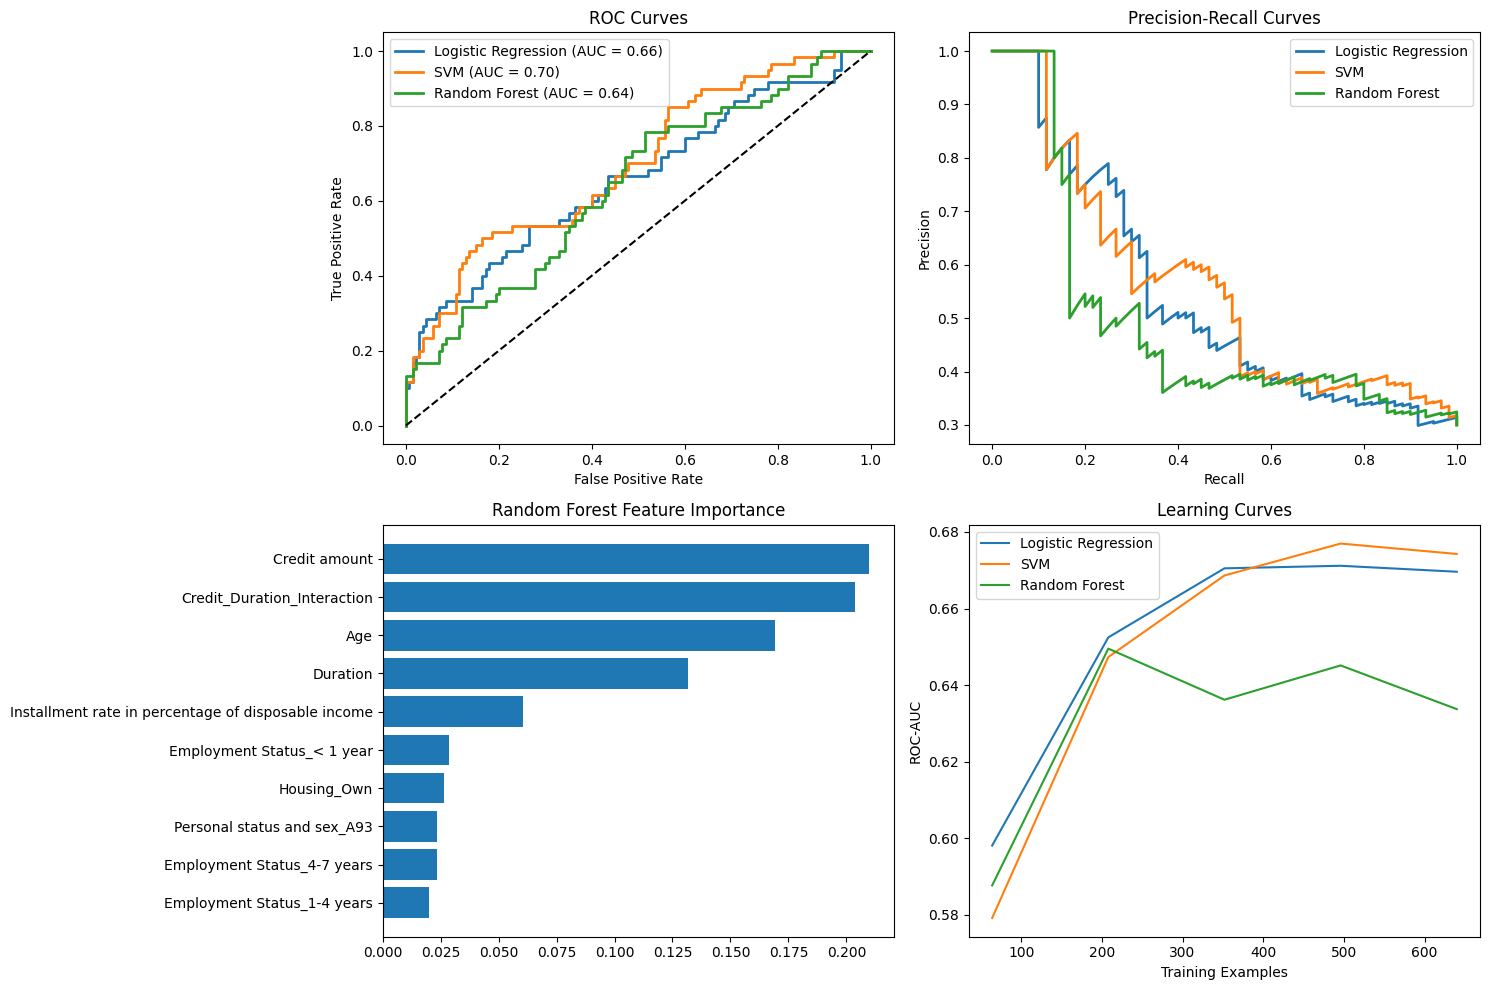

In [48]:
# 5. Evaluation and Visualization
plt.figure(figsize=(15, 10))

# ROC Curve
plt.subplot(2, 2, 1)
for name, model in best_models.items():
    if hasattr(model, 'predict_proba'):
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

# Precision-Recall Curve
plt.subplot(2, 2, 2)
for name, model in best_models.items():
    if hasattr(model, 'predict_proba'):
        precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(recall, precision, lw=2, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()

# Feature Importance for Random Forest
plt.subplot(2, 2, 3)
feature_importances = best_models['Random Forest'].named_steps['randomforestclassifier'].feature_importances_
cat_feature_names = best_models['Random Forest'].named_steps['columntransformer'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(cat_feature_names)
sorted_idx = np.argsort(feature_importances)[-10:]  # Top 10 features
plt.barh(np.array(all_feature_names)[sorted_idx], feature_importances[sorted_idx])
plt.title('Random Forest Feature Importance')

# Learning Curves
plt.subplot(2, 2, 4)
for name, model in best_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=StratifiedKFold(5),
        train_sizes=np.linspace(0.1, 1.0, 5), scoring='roc_auc')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label=name)
plt.xlabel('Training Examples')
plt.ylabel('ROC-AUC')
plt.title('Learning Curves')
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
#  Final Evaluation Report
print("\n=== Final Test Performance ===")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None
    
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))
    if y_proba is not None:
        print(f" ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")
    print(" Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


=== Final Test Performance ===

Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       140
           1       0.63      0.32      0.42        60

    accuracy                           0.74       200
   macro avg       0.70      0.62      0.63       200
weighted avg       0.72      0.74      0.71       200

 ROC-AUC: 0.660
 Confusion Matrix:
[[129  11]
 [ 41  19]]

SVM:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       140
           1       0.39      0.55      0.46        60

    accuracy                           0.61       200
   macro avg       0.58      0.59      0.58       200
weighted avg       0.65      0.61      0.62       200

 ROC-AUC: 0.699
 Confusion Matrix:
[[89 51]
 [27 33]]

Random Forest:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       140
           1       0.45      0.32      0.37      

After our feature engineering, class balancing, and hyperparameter tuning process, Logistic Regression emerged as the best-performing model, achieving 74% accuracy with strong precision (0.76) and recall (0.92) for the majority class, though its recall for bad credit cases remains low (0.32). SVM improved its ROC-AUC to 0.699, showing a better balance between recall and precision for bad credit cases, but overall accuracy (61%) lagged behind. Random Forest performed the weakest, with a 68% accuracy and an ROC-AUC of 0.643, struggling significantly with bad credit classification (recall 0.32). While Logistic Regression is the most balanced model, further improvement in recall for bad credit cases is necessary, possibly through threshold tuning or ensemble methods 